In [1]:
from sklearn.model_selection import train_test_split  # Importa a função para dividir os dados em conjuntos de treino e teste.
import numpy as np  # Importa o NumPy, uma biblioteca fundamental para trabalhar com arrays e operações matemáticas em Python.
from sklearn.tree import DecisionTreeClassifier  # Importa o classificador de árvore de decisão do Scikit-learn.
import pandas as pd  # Importa o pandas, uma biblioteca para manipulação e análise de dados, especialmente DataFrames.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Importa várias métricas para avaliar o desempenho do modelo.
import matplotlib.pyplot as plt  # Importa o Matplotlib para visualização de dados.
import seaborn as sns  # Importa o Seaborn, que é uma biblioteca para visualizações estatísticas, complementando o Matplotlib.
from sklearn import tree  # Importa o módulo de árvores do Scikit-learn, usado para visualização e manipulação de árvores de decisão.

In [25]:
# Criando um DataFrame com pandas, contendo informações sobre idade, manutenção, falhas, automação e classificação.
data = pd.DataFrame({
    'idade': [5, 10, 3, 8, 1, 15],  # Representa a velocidade de operação ou desempenho, com valores variando de 1 a 15.
    'manutencao': ['bom','ruim','excelente','regular','excelente','ruim'],  # Número de manutenções realizadas, indicando a frequência de manutenção para cada item.
    'falhas': [0, 3, 0, 2, 0, 5],  # Contagem de falhas registradas, mostrando quantas vezes cada item falhou.
    'automacao': [10, 0, 5, 10, 5, 0],  # Nível de automação, possivelmente representando o grau de automação de cada item, variando de 0 a 10.
    'classif': ['segura', 'não segura', 'segura', 'não segura', 'segura', 'não segura']  # Classificação de cada entrada como "segura" ou "não segura", indicando o estado de confiabilidade.
})

data['hist_m'] = data['manutencao'].map({'bom':1,'ruim':0,'regular':2,'excelente':3})
data.head()

,idade,manutencao,falhas,automacao,classif,hist_m
0,5,bom,0,10,segura,1
1,10,ruim,3,0,não segura,0
2,3,excelente,0,5,segura,3
3,8,regular,2,10,não segura,2
4,1,excelente,0,5,segura,3


Acurácia: 1.0
Precisão: 1.0


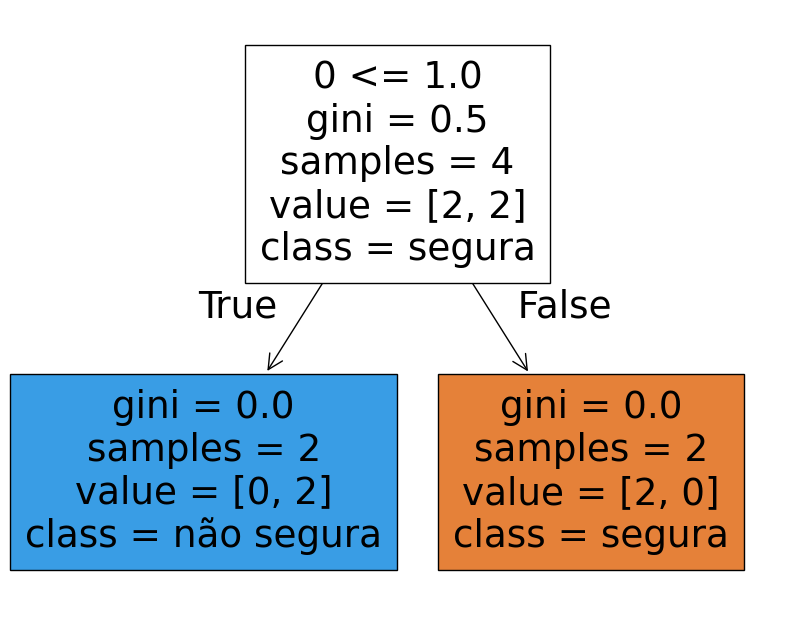

In [26]:
x = np.array(data['falhas'])  
y = np.array(data['classif'])  # Extrai a coluna 'classif' do DataFrame e a converte em um array NumPy.

# Divide os dados em conjuntos de treino e teste, usando 20% dos dados para teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=42)

model = DecisionTreeClassifier()  # Cria um modelo de classificador de árvore de decisão.
model.fit(x_treino, y_treino)  # Treina o modelo usando os dados de treino.

prev = model.predict(x_teste)  # Faz previsões sobre o conjunto de teste.
accuracy = accuracy_score(y_teste, prev)  # Calcula a acurácia das previsões.
precisao = precision_score(y_teste, prev, pos_label='não segura')  

matrix = confusion_matrix(y_teste, prev)  # Gera a matriz de confusão para as previsões.

# Exibe os resultados de acurácia e precisão.
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precisao}')

# Cria uma visualização da árvore de decisão treinada.
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=x.tolist(), class_names=y.tolist(), filled=True)
plt.show()  # Mostra o gráfico da árvore de decisão.

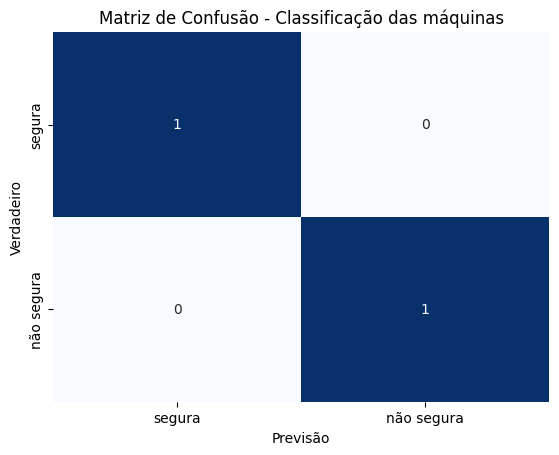

In [27]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['segura', 'não segura'],yticklabels=['segura', 'não segura'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()